# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [5]:
df = pd.read_csv(r'all_upwork_jobs_2024-02-07-2024-03-24 (1).csv')
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [6]:
df.shape

(244828, 8)

In [7]:
df.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [9]:
# Check the missing values
df.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [10]:
df.describe()

,hourly_low,hourly_high,budget
count,102422.000000,98775.000000,103891.000000
mean,17.339644,41.970610,911.473564
std,18.140065,47.850892,15729.738834
min,3.000000,3.000000,5.000000
25%,8.000000,20.000000,25.000000
50%,15.000000,30.000000,100.000000
75%,20.000000,50.000000,300.000000
max,998.000000,999.000000,1000000.000000


## Data Cleaning and Preprocessing

In [11]:
# Drop rows where the title is missing, as it's a critical column
df = df.dropna(subset=['title'])
df

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [12]:
# Impute missing values for hourly_low and hourly_high using their respective medians
df['hourly_low'] = df['hourly_low'].fillna(df['hourly_low'].median())
df['hourly_high'] = df['hourly_high'].fillna(df['hourly_high'].median())
df['budget'] = df['budget'].fillna(df['budget'].median())
df.head(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India


In [13]:
# Fill missing values in the 'country' column with the most frequent country
most_frequent_country = df['country'].mode()[0]
most_frequent_country

'United States'

In [14]:
df['country'].fillna(most_frequent_country, inplace=True)

In [15]:
df.isnull().sum()

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64

## Task 1: Job Title Keywords vs. Salaries 

In [16]:
df['average_hourly'] = (df['hourly_low'] + df['hourly_high']) / 2
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,average_hourly
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,22.5
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,22.5
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,20.0
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,22.5
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,22.5


In [17]:
df['salary'] = df['average_hourly'].fillna(df['budget']) 
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,average_hourly,salary
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,22.5,22.5
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,22.5,22.5
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,20.0,20.0
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,22.5,22.5
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,22.5,22.5


In [19]:
# Drop rows where salary or title is missing
df = df.dropna(subset=['salary', 'title'])

In [20]:
# Convert titles to lowercase and remove special characters for consistency
df['cleaned_title'] = df['title'].str.lower().str.replace(r'[^a-zA-Z\s]', '', regex=True)
df.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,average_hourly,salary,cleaned_title
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,22.5,22.5,experienced media buyer for solar pannel and r...
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,22.5,22.5,full stack developer
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,20.0,20.0,smma bubble app
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,22.5,22.5,talent hunter specialized in marketing
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,22.5,22.5,data engineer


In [21]:
# Use CountVectorizer to extract top keywords
vectorizer = CountVectorizer(stop_words='english', max_features=50)  # Top 50 keywords
keywords_matrix = vectorizer.fit_transform(df['cleaned_title'])
keywords_df = pd.DataFrame(keywords_matrix.toarray(), columns=vectorizer.get_feature_names_out())
keywords_df.head()

,ads,ai,amp,app,assistant,brand,build,business,channel,company,...,shopify,social,specialist,video,virtual,web,website,wordpress,writer,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Calculate Keyword-Salary Correlations
keywords_df['salary'] = df['salary'].values
correlations = keywords_df.corr()['salary'].sort_values(ascending=False)
correlations

salary         1.000000
ads            0.025768
expert         0.024096
facebook       0.024039
sales          0.019678
help           0.016291
business       0.013334
ai             0.012031
writer         0.010036
needed         0.009993
new            0.008604
company        0.008550
developer      0.006520
google         0.005337
development    0.005012
brand          0.004989
experienced    0.003378
product        0.001465
build          0.001393
project        0.000693
marketing      0.000111
need          -0.001311
web           -0.003387
email         -0.003543
design        -0.004203
looking       -0.005314
page          -0.005688
app           -0.006533
designer      -0.006555
amp           -0.007412
logo          -0.007420
create        -0.008371
specialist    -0.010258
graphic       -0.010275
channel       -0.011005
wordpress     -0.015437
shopify       -0.016220
website       -0.016573
content       -0.017229
data          -0.019006
seo           -0.019695
manager       -0

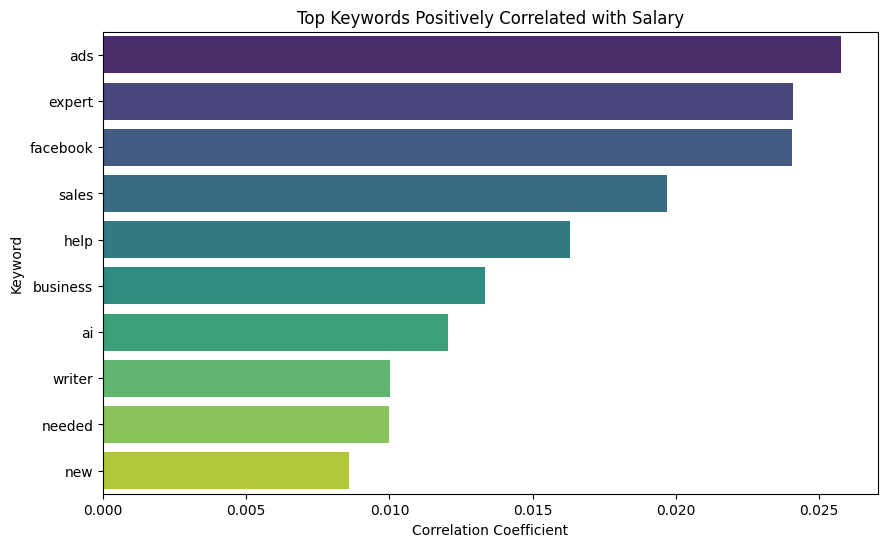

In [23]:
# Top 10 positive and negative correlations
top_keywords = correlations.iloc[1:11]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='viridis')
plt.title('Top Keywords Positively Correlated with Salary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Keyword')
plt.show()

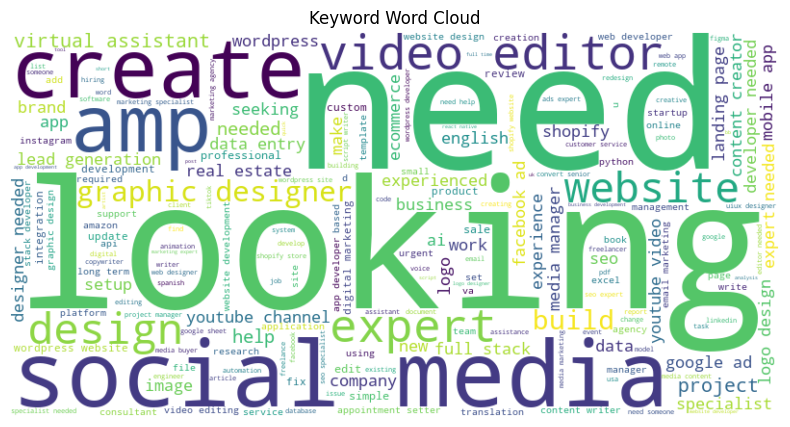

In [24]:
# Word Cloud for Top Keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Word Cloud')
plt.show()

In [25]:
# Save Report
correlations.to_csv(r'C:\Users\DELL\Desktop\Next Hikes Documents\Project8\data\keyword_salary_correlations.csv', index=True)
df.to_csv(r'C:\Users\DELL\Desktop\Next Hikes Documents\Project8\data\cleaned_all_upwork_jobs_data.csv', index=True)

## Outputs:
Bar Plot: Top keywords positively correlated with salaries.

Word Cloud: Visualization of the most common job title keywords.

Report: CSV file of keyword-salary correlations.